In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r'C:\Users\SH2\Downloads\archive (11)\dailyActivity_merged.csv')

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Checking null values 


In [4]:
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
# How many rows and columns for the dataset
df.shape

(940, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# making some changes with data
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format ='%m/%d/%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [9]:
df['totalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] +df['LightlyActiveMinutes']+ df['SedentaryMinutes'] 

In [10]:
df['totalMinutes'].sample(5)

504     983
376     742
403    1440
557    1114
191    1244
Name: totalMinutes, dtype: int64

In [11]:
# Now let’s have a look at the descriptive statistics of the dataset:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


Text(0.5, 1.0, 'Relationship between Calories & Total Steps')

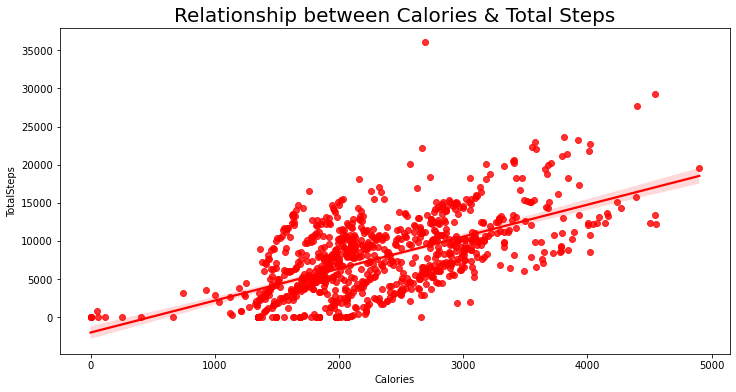

In [12]:
# making a scatterplot to Know the relationship between the calories & total steps
plt.figure(figsize=(12,6))
sns.regplot(data = df,x='Calories',y='TotalSteps',color ='red')
plt.title('Relationship between Calories & Total Steps',size =20)

([<matplotlib.patches.Wedge at 0x293467d94f0>,
 [Text(1.0983633515717721, 0.059982896929240755, 'VeryActiveMinutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'FairlyActiveMinutes'),
  Text(0.8580470838875357, 0.6882987736674362, 'LightlyActiveMinutes'),
  Text(-0.9161474698671842, -0.6088298723419843, 'SedentaryMinutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.74'),
  Text(0.5937830262300761, 0.086149392110756, '1.11'),
  Text(0.4680256821204739, 0.3754356947276924, '15.82'),
  Text(-0.4997168017457368, -0.33208902127744594, '81.33')])

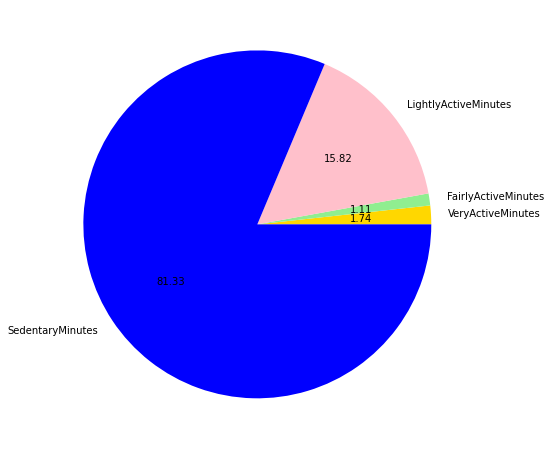

In [26]:
plt.figure(figsize=(18,8))
labels = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
colors = ['gold','lightgreen', "pink", "blue"]
counts = df[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
plt.pie(counts,labels =labels,colors =colors,autopct='%.2f')

In [29]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = df[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text ='Total Active Minutes')
fig.show()

In [33]:
df['day'] = df['ActivityDate'].dt.day_name()
df['day'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day, dtype: object

In [34]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalMinutes,day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,Saturday


Text(0, 0.5, 'VeryActiveMinutes')

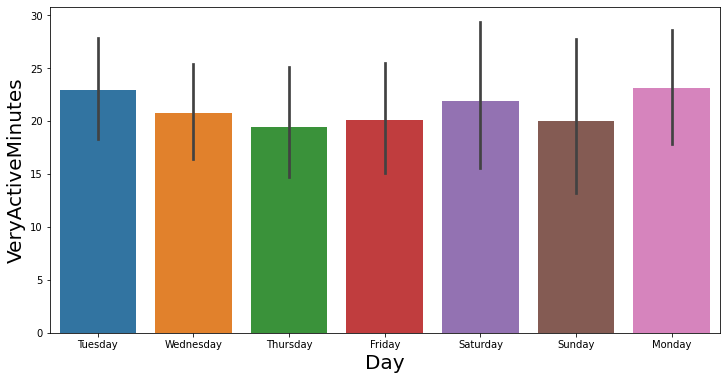

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data =df ,x='day',y='VeryActiveMinutes')
plt.xlabel('Day',size=20)
plt.ylabel('VeryActiveMinutes',size=20)